In [1]:
from keras import layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [2]:
data_dir = '/Users/camargo/Projects/deeplearning/data/dogs-vs-cats-small'
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')
test_dir = os.path.join(data_dir, 'test')

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150, 150)
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150, 150)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [3]:
for data_batch, labels_batch in train_generator:
    print(f'data_batch: {data_batch.shape}')
    print(f'labels_batch: {labels_batch.shape}')
    break

data_batch: (20, 150, 150, 3)
labels_batch: (20,)


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [5]:
model.compile(
    loss='binary_crossentropy',
    metrics=['acc'],
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
)

In [6]:
history = model.fit(
    train_generator,
    epochs=30,
    steps_per_epoch=100,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 32s 318ms/step - loss: 0.6875 - acc: 0.5455 - val_loss: 0.7251 - val_acc: 0.5050
Epoch 2/30
100/100 [==============================] - 32s 316ms/step - loss: 0.6591 - acc: 0.6065 - val_loss: 0.6470 - val_acc: 0.6160
Epoch 3/30
100/100 [==============================] - 32s 318ms/step - loss: 0.6106 - acc: 0.6675 - val_loss: 0.6110 - val_acc: 0.6570
Epoch 4/30
100/100 [==============================] - 31s 313ms/step - loss: 0.5640 - acc: 0.7175 - val_loss: 0.6481 - val_acc: 0.6320
Epoch 5/30
100/100 [==============================] - 31s 312ms/step - loss: 0.5400 - acc: 0.7280 - val_loss: 0.5949 - val_acc: 0.6690
Epoch 6/30
100/100 [==============================] - 31s 310ms/step - loss: 0.5062 - acc: 0.7495 - val_loss: 0.6224 - val_acc: 0.6510
Epoch 7/30
100/100 [==============================] - 31s 310ms/step - loss: 0.4877 - acc: 0.7625 - val_loss: 0.5767 - val_acc: 0.6980
Epoch 8/30
100/100 [==============================] - 3

In [7]:
model.save('cats-vs-dogs-convnet-v1.h5')

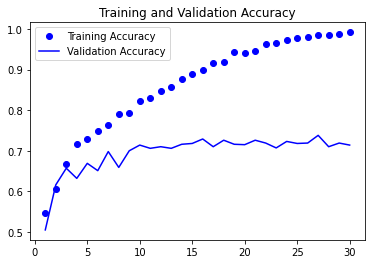

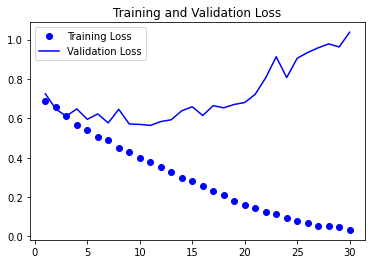

In [9]:
loss = history.history.get('loss')
acc = history.history.get('acc')
val_loss = history.history.get('val_loss')
val_acc = history.history.get('val_acc')

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()